In [145]:
from sklearn.cluster import KMeans
import numpy as np

In [146]:
np.random.seed(42)
data1 = np.random.randn(100, 2) + [2, 2]
data2 = np.random.randn(100, 2) + [-2, -2]
data3 = np.random.randn(100, 2) + [2, -2]

x = np.vstack([data1, data2, data3])

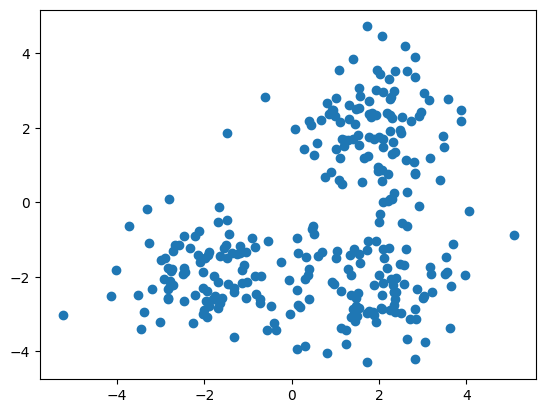

In [147]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1])

#### 2개의 군집 생성

In [148]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=0)

In [149]:
labels = kmeans.labels_ # kmeans가 만든 레이블
centroids = kmeans.cluster_centers_ # 두 개의 점의 중심점

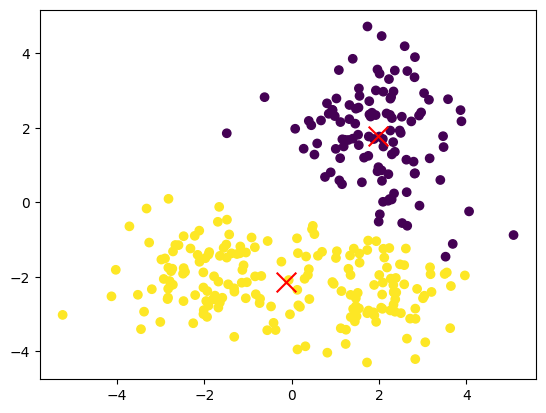

In [150]:
plt.scatter(x[:, 0], x[:, 1], c=labels)
#centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='centroids')
plt.show()

In [151]:
new_data = np.array([[0, 0], [3, 3], [-3, -3], [2, -3]])
new_labels = kmeans.predict(new_data)
new_labels

array([1, 0, 1, 1], dtype=int32)

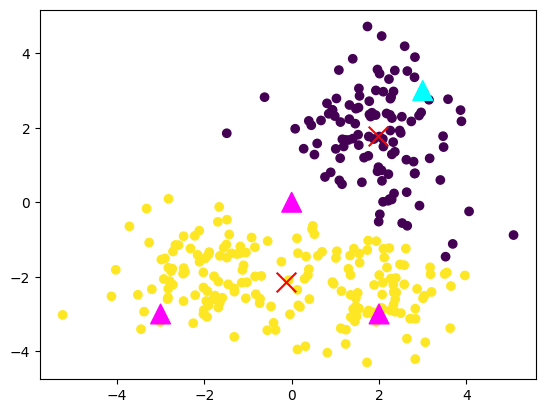

In [152]:
plt.scatter(x[:, 0], x[:, 1], c=labels)
#centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='centroids')
# 테스트 데이터
plt.scatter(new_data[:, 0], new_data[:, 1], c=new_labels, s=200, marker='^', cmap='cool')
plt.show()

#### 3개의 군집 생성

In [153]:
three_kmeans = KMeans(n_clusters=3, random_state=0)
three_kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

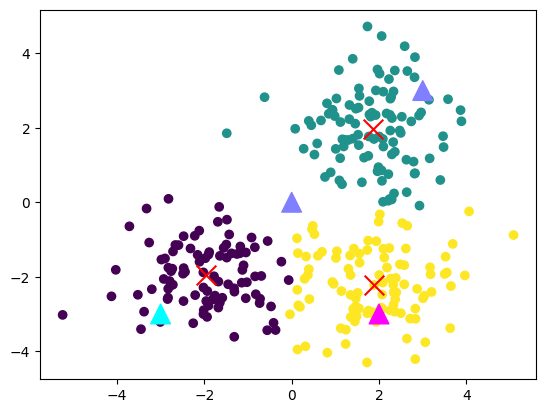

In [154]:
three_labels = three_kmeans.labels_ # kmeans가 만든 레이블
three_centroids = three_kmeans.cluster_centers_ # 두 개의 점의 중심점
three_data = np.array([[0, 0], [3, 3], [-3, -3], [2, -3]])
three_label = three_kmeans.predict(new_data)

plt.scatter(x[:, 0], x[:, 1], c=three_labels)
#centroids
plt.scatter(three_centroids[:, 0], three_centroids[:, 1], c='red', marker='x', s=200, label='centroids')
# 테스트 데이터
plt.scatter(three_data[:, 0], three_data[:, 1], c=three_label, s=200, marker='^', cmap='cool')
plt.show()

In [ ]:
np.random.seed(42)
data1 = np.random.randn(100, 2) + [2, 2]
data2 = np.random.randn(100, 2) + [-2, -2]
data3 = np.random.randn(100, 2) + [2, -2]

x = np.vstack([data1, data2, data3])

#### 실루엣 기법 사용

In [155]:
from sklearn.metrics import silhouette_samples, silhouette_score
 
# 실루엣 점수 계산
silhouette_avg = silhouette_score(x, three_labels)
sample_silhouette_values = silhouette_samples(x, three_labels)
sample_silhouette_values[:10]

array([0.67792055, 0.65498465, 0.6972439 , 0.59248778, 0.7213421 ,
       0.66159095, 0.16290174, 0.50969325, 0.68337558, 0.37798048])

In [156]:
silhouette_avg

np.float64(0.5574456217568448)

# DBSCAN

In [157]:
from sklearn.datasets import make_blobs

#중심점 설정 > 데이터 생성을  위한 > dbscan에 설정하는 것은 아님.
centers = [[1, 1], [-1, -1], [1, -1]]
 
# 실습용 데이터 생성하기
x, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)
 
x.shape, labels_true.shape
 

((750, 2), (750,))

In [158]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [159]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
 
# DBSCAN 모델 정의 및 학습하기
db = DBSCAN(eps=0.3, min_samples=10)
labels = db.fit_predict(x_scaled)
labels[:100]

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0])

In [160]:
# 생성된 클러스터의 종류
unique_labels = set(labels)

In [161]:
# 노이즈의 갯수
list(labels).count(-1)

18

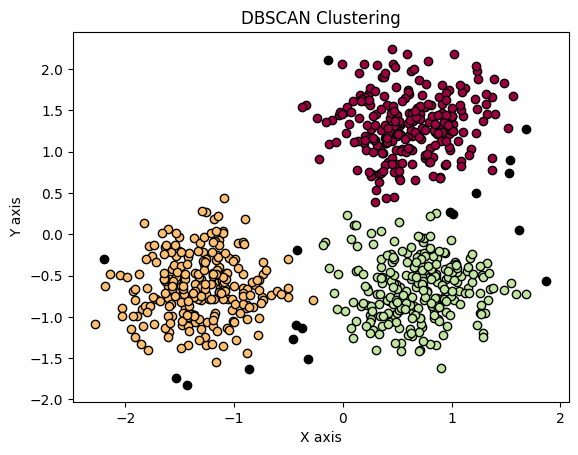

In [162]:
# 결과 시각화
 # 색상 (스펙트럼) 설정
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
 
for k, col in zip(unique_labels, colors):
    if k == -1:
        # 노이즈는 검은색으로 표시
        col = [0, 0, 0, 1]
 
    # 현재 클러스터(k)에 속하는 데이터 마스크 설정
    class_member_mask = (labels == k)
    # 현재 클러스터(k)에 속하는 데이터 포인트 추출
    xy = x_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
 
plt.title('DBSCAN Clustering')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()
 